# Caffe, Caffe2 Research
---

## Deep learning framework timeline
  
  
![time_line](http://www.popit.kr/wp-content/uploads/2017/05/deeplearning_fw_timeline1.png)

## Caffe

### 특징
1. CNN Model 생성에 특화되어 있음.  
 * 반대로 이야기하면 General하지 못함(Speech, Text Data등).
 * Caffe2에서는 CNN을 넘어서 General한 Model 생성을 Motive로 개발됨.
2. Protobuf로 Model 정의.

## Caffe vs Tensorflow model define


![tensorflow_define](https://image.slidesharecdn.com/aidentify-170501003006/95/-49-1024.jpg?cb=1493598757)
![caffe_define](https://image.slidesharecdn.com/aidentify-170501003006/95/-43-638.jpg?cb=1493598757)

# Caffe2 vs Tensorflow
<br>
<br>
## 1. speed
![speed](../docs/assets/caffe_vs_tensorflow/time.png)
<br>
<br>
## 2. memory space
![memory](../docs/assets/caffe_vs_tensorflow/memory.png)
<br>
출처: http://cs242.stanford.edu/assets/projects/2017/liubaige-xzang.pdf

# Caffe2 Basic Concepts
---

## Concept
Caffe2 기본 컨셉에 대해 살펴보기 전에 이해를 돕기 위해 Tensorflow와 비교해보도록 하겠습니다. 
![concept](../docs/assets/caffe_vs_tensorflow/concept.png)
출처: http://cs242.stanford.edu/assets/projects/2017/liubaige-xzang.pdf

In [23]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

# We'll also import a few standard python libraries
from matplotlib import pyplot
import numpy as np
import time

# These are the droids you are looking for.
from caffe2.python import core, workspace
from caffe2.proto import caffe2_pb2

# Let's show all plots inline.
%matplotlib inline

## Blobs
named chunk of **data** in memory<br>
which contains **tensor** (n-dimensional memory)


## Workspaces
workspace consists of blobs

`FeedBlob()` 을 통해서 blob을 workspace에 feed해 보겠습니다.

In [24]:
X = np.random.randn(2, 3).astype(np.float32)
workspace.FeedBlob("X", X)

True

Feed한 blob을 살펴보겠습니다.

In [25]:
print("Current blobs in the workspace: {}".format(workspace.Blobs()))
print("Fetched X:\n{}".format(workspace.FetchBlob("X")))

Current blobs in the workspace: ['W', 'X', 'Y', 'b']
Fetched X:
[[ 0.8045713   0.04424965  1.511903  ]
 [-0.15851787 -0.6739198   0.91615844]]


## Nets

Nets are **computation graphs**.


Network를 생성할때 연관된 Protocol buffer는 비어있는 상태입니다.

In [26]:
net = core.Net("test_net")
print("Current network proto:\n\n{}".format(net.Proto()))

Current network proto:

name: "test_net_1"



GaussianFill을 사용한 Random Data를 채운 Blob을 생성하게 보겠습니다.

## q-Gaussian distribution
![gaussian](https://upload.wikimedia.org/wikipedia/commons/thumb/3/35/The_PDF_of_QGaussian.svg/488px-The_PDF_of_QGaussian.svg.png)

In [27]:
X = net.GaussianFill([], ["X"], mean=0.0, std=1.0, shape=[2, 3], run_once=0)
print("New network proto:\n\n{}".format(net.Proto()))

New network proto:

name: "test_net_1"
op {
  output: "X"
  name: ""
  type: "GaussianFill"
  arg {
    name: "mean"
    f: 0.0
  }
  arg {
    name: "std"
    f: 1.0
  }
  arg {
    name: "shape"
    ints: 2
    ints: 3
  }
  arg {
    name: "run_once"
    i: 0
  }
  debug_info: "  File \"/Users/yoyota/anaconda3/envs/caffe2_py36/lib/python3.6/runpy.py\", line 193, in _run_module_as_main\n    \"__main__\", mod_spec)\n  File \"/Users/yoyota/anaconda3/envs/caffe2_py36/lib/python3.6/runpy.py\", line 85, in _run_code\n    exec(code, run_globals)\n  File \"/Users/yoyota/anaconda3/envs/caffe2_py36/lib/python3.6/site-packages/ipykernel_launcher.py\", line 16, in <module>\n    app.launch_new_instance()\n  File \"/Users/yoyota/anaconda3/envs/caffe2_py36/lib/python3.6/site-packages/traitlets/config/application.py\", line 658, in launch_instance\n    app.start()\n  File \"/Users/yoyota/anaconda3/envs/caffe2_py36/lib/python3.6/site-packages/ipykernel/kernelapp.py\", line 478, in start\n    self.io

## Operator
Fully Connected Layer를 사용해 보겠습니다.

In [28]:
W = net.GaussianFill([], ["W"], mean=0.0, std=1.0, shape=[5, 3], run_once=0)
b = net.ConstantFill([], ["b"], shape=[5,], value=1.0, run_once=0)

In [29]:
Y = X.FC([W, b], ["Y"])

In [30]:
print("Current network proto:\n\n{}".format(net.Proto()))

Current network proto:

name: "test_net_1"
op {
  output: "X"
  name: ""
  type: "GaussianFill"
  arg {
    name: "mean"
    f: 0.0
  }
  arg {
    name: "std"
    f: 1.0
  }
  arg {
    name: "shape"
    ints: 2
    ints: 3
  }
  arg {
    name: "run_once"
    i: 0
  }
  debug_info: "  File \"/Users/yoyota/anaconda3/envs/caffe2_py36/lib/python3.6/runpy.py\", line 193, in _run_module_as_main\n    \"__main__\", mod_spec)\n  File \"/Users/yoyota/anaconda3/envs/caffe2_py36/lib/python3.6/runpy.py\", line 85, in _run_code\n    exec(code, run_globals)\n  File \"/Users/yoyota/anaconda3/envs/caffe2_py36/lib/python3.6/site-packages/ipykernel_launcher.py\", line 16, in <module>\n    app.launch_new_instance()\n  File \"/Users/yoyota/anaconda3/envs/caffe2_py36/lib/python3.6/site-packages/traitlets/config/application.py\", line 658, in launch_instance\n    app.start()\n  File \"/Users/yoyota/anaconda3/envs/caffe2_py36/lib/python3.6/site-packages/ipykernel/kernelapp.py\", line 478, in start\n    sel

## model visualization

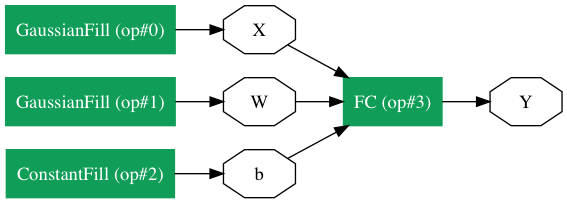

In [31]:
from caffe2.python import net_drawer
from IPython import display
graph = net_drawer.GetPydotGraph(net, rankdir="LR")
display.Image(graph.create_png(), width=800)

the net above is essentially a protobuf that holds the definition of the network. When we actually run the network, what happens under the hood is:
- A C++ net object is instantiated from the protobuf
- The instantiated net's Run() function is called  

## 결과값

In [32]:
workspace.ResetWorkspace()
print("Current blobs in the workspace: {}".format(workspace.Blobs()))
workspace.RunNetOnce(net)
print("Blobs in the workspace after execution: {}".format(workspace.Blobs()))
# Let's dump the contents of the blobs
for name in workspace.Blobs():
    print("{}:\n{}".format(name, workspace.FetchBlob(name)))

Current blobs in the workspace: []
Blobs in the workspace after execution: ['W', 'X', 'Y', 'b']
W:
[[-0.03243652  0.30797482  0.33739084]
 [-1.1140127  -0.31872427  0.96567816]
 [-0.48160875  0.6748931   1.1282337 ]
 [ 0.42430842  0.8523571  -0.7266397 ]
 [ 0.43736738  1.0576086  -0.25542414]]
X:
[[-0.26759478 -0.7682788   1.7358925 ]
 [ 0.5611609  -0.32269505 -0.5026339 ]]
Y:
[[ 1.3577435   3.2192867   2.5688624  -1.0297589  -0.37296438]
 [ 0.71283185 -0.00767231 -0.05513322  1.3282876   1.0325333 ]]
b:
[1. 1. 1. 1. 1.]


# 출처
1. http://www.popit.kr/%EB%94%A5%EB%9F%AC%EB%8B%9D-%ED%94%84%EB%A0%88%EC%9E%84%EC%9B%8C%ED%81%AC-%EC%A1%B0%EC%82%AC%EC%99%80-%EB%AA%87%EA%B0%80%EC%A7%80-%ED%99%8D%EB%B3%B4/

2. https://www.slideshare.net/JunyiSong1/ss-75552936

3. https://caffe2.ai/docs/tutorials.html

4. http://cs242.stanford.edu/assets/projects/2017/liubaige-xzang.pdf